In [87]:
%pylab inline
import numpy as np
import pdb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import cycle

Populating the interactive namespace from numpy and matplotlib


In [24]:
rodents = pd.read_csv('../../data/rodents.csv', sep=';')
rodents.head()

,weight,height,type
0,233.479920,23.514130,rat
1,231.324467,26.033830,rat
2,17.906954,6.846577,mouse
3,230.276523,24.077800,rat
4,20.360593,6.605983,mouse


In [89]:
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
def predict(inp_vec, weights):
    """
    Parameters:
    inp_vec:
        An input vector consisting of sepal length and width
    weights:
        A vector of same length as inp_vec, containing a weight for each input
    return:
        A class label, either 1 for 'setosa' or -1 for 'other'
    """
    class_label_prediction = perceptron(inp_vec, weights)
    return class_label_prediction


def pla(training_data, no_iterations=10000, eta=0.5):
    """
    Find the proper weights to use in the perceptron based on data and target
    Parameters:
    training_data: list of vectors (features), as predictors zipped with a target value
    no_iterations: number of times to adjust the weights to get them as close as possible to the optimal number
    eta: the learning rate (prevent learning to go pendulum from one extreme error to the opposite)
    """
    
    dim = len(training_data[0][0]) # len = 2 (petal width and height)
    weights =  np.random.random(dim) # error and weights (for x and y) start out as random numbers
    
    # initial_error
    error = np.random.random()
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        #pdb.set_trace()
        #breakpoint()
        inp_vec, expected_label = training_data[i % len(training_data)] # get the next feature set and label (start over after reaching end)
        perceptron_output = perceptron(inp_vec, weights) # perceptron output id a decimal between 0 and 1
        error = expected_label - perceptron_output       # error 
        weights += eta * error * inp_vec # accumulate the weights
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 

def compute_line(weights):
    """
    Visualizing Linear Separability by using weights/norm(weights) wich are othogonal to the division line.
    Parameters:
    weights: the weights calculated by PLA
    """
    norm = np.linalg.norm(weights) # calculating the frobenius norm adjusting values measured on different scales to a notionally common scale
    ww = weights / norm # weight vector is perpendicular (or othogonal) to the division line
    ww1 = [ww[1], -ww[0]] # first point on our division line
    ww2 = [-ww[1] , ww[0]] # second point on our division line
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0]) # slope = delta y / delta x
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]      # intercept = delta x * slope + y(x1)
    print('slope:',m,'bias',b)
    return m, b

def plot_data(data, w_line=None):
    """
    show data in 2d petal length vs width and target being 1 or -1 (indicating if flower is iris setosa or not.)
    Parameters:
    data: array of type tuple(array[petal_height, petal_width], target) target is either 1 or -1
    w_line: a visual line to seperate the 2 clusters. If none is provided it will not show
    """
    # print(data[:10])
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line:                  # only plot a division line if one exists
        l = np.linspace(0, 8.5) # 50 evenly spaced numbers for the x axis
        m, b = w_line           # m = slope, b = intercept
        plt.plot(l, m * l + b, 'y-', lw=2) # lw is line width

    plt.axis([0, 8.5, 0, 5])
    plt.title('Iris Characteristics')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend()



### Part one: general
1. Look at the activation_function and plot the y-values for each x from -5,5 spaced with 0.5 
2. Change the perceptron method from the notebook to use the [numpy.dot() method](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) in line 12 instead of the lengthy sum() function

In [13]:
rnge = np.linspace(-5.5, 0.5, num=len(rodents))
values = [activation_function(i) for i in rnge]

def perceptron(inp, weights):
    """
    Given a list of feature (x) values and a list of weights, 
    calculates the dot product of the 2 lists and returns 1 or -1 (fire or don't)
    Parameters:
    inp: vector of input predictors
    weights: vector of weights to be ajusted for precise prediction of output.
    """
    # This is the same as the dot product np.dot(i, w)
    dot_product = np.dot(inp, weights)
    #dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

### Part two: rodent data
1. Make a new scatter plot with datapoints of weights vs heights. Choose different colors for rats and mice
2. Manually find the optimal linear function to divide the 2 groups (y = aX+b). Plot it on the scatter plot
3. What is the slope and intercept of the linear function?
4. Now change the 'type' column to represent rats as 1 and mice as -1
5. Clean up any rows with null data
6. Use these weights herè [40,-190] to determine if the following 3 animals are mice or rats: 
```
[[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
```
7. Find the (approximately) optimal weights using the perceptron learning algorithm
8. Plot the weightline
9. Plot the division line

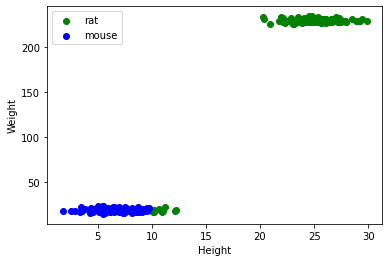

In [4]:
height = rodents[rodents.type == 'rat'].iloc[:,1]
weight = rodents[rodents.type == 'rat'].iloc[:,0]
plt.scatter(height, weight, c='g', label='rat')

height = rodents[rodents.type == 'mouse'].iloc[:,1]
weight = rodents[rodents.type == 'mouse'].iloc[:,0]
plt.scatter(height, weight, c='b', label='mouse')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

In [30]:
from sklearn import preprocessing
rodents.dropna(inplace=True)

#label_enc = preprocessing.LabelEncoder()
#rodents['type'] = label_enc.fit_transform(rodents['type'].astype(str))

rodents.replace(to_replace=['rat', 'mouse'], value=['1', '-1'], inplace=True)

In [31]:
data = [[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
weights = [40, -190]

for i in data:
    print(predict(i, weights))

1
-1
1


In [85]:
class_labels = np.copy(rodents.type)
data = rodents.drop(['type'], 'columns').to_numpy()
training_data = [(d, int(l)) for d, l in zip(data, class_labels)]
learned_weights, weight_history = pla(training_data)
print(learned_weights)

[  46.83374372 -190.0912344 ]


slope: 0.24637508335036504 bias 0.23922158317549852


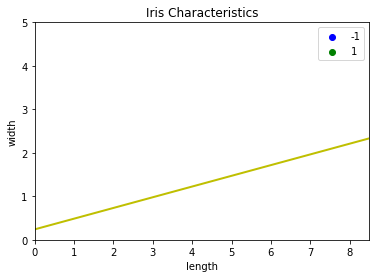

In [90]:
plot_data(training_data, compute_line(learned_weights))